In [28]:
# import relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/EPL 19-20 outfield openplay stats per 90_min500.csv')
pd.set_option('display.max_columns', None)
df.head()

,player_id,position,player,team,foot,age,team_id,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_fastbreak,att_rf_total,att_lf_total,att_hd_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_cross_nocorner,accurate_cross_nocorner,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,assist_pass_lost,assist_blocked_shot,assist_attempt_saved,assist_post,assist_handball_won,assist_own_goal,assist_penalty_won,open_play_pass,successful_open_play_pass,attempted_tackle_foul,fifty_fifty,successful_fifty_fifty,put_through,successful_put_through,blocked_pass,failed_to_block,touches_in_opp_box,attempts_ibox,attempts_obox,expected_goals,expected_goals_nonpenalty,expected_goals_openplay,expected_goals_hd,expected_goals_lf,expected_goals_rf,expected_goals_conceded,expected_goals_nonpenalty_conceded,expected_goalsontarget,expected_goalsontarget_nonpenalty,expected_goalsontarget_conceded,expected_goalsontarget_nonpenalty_conceded,expected_assists,expected_assists

In [3]:
# Filter for players who have played at least 1000 minutes
mask = (df.position == 'Defender') 
df = df.loc[mask]
df.head()

,player_id,position,player,team,foot,age,team_id,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_fastbreak,att_rf_total,att_lf_total,att_hd_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_cross_nocorner,accurate_cross_nocorner,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,assist_pass_lost,assist_blocked_shot,assist_attempt_saved,assist_post,assist_handball_won,assist_own_goal,assist_penalty_won,open_play_pass,successful_open_play_pass,attempted_tackle_foul,fifty_fifty,successful_fifty_fifty,put_through,successful_put_through,blocked_pass,failed_to_block,touches_in_opp_box,attempts_ibox,attempts_obox,expected_goals,expected_goals_nonpenalty,expected_goals_openplay,expected_goals_hd,expected_goals_lf,expected_goals_rf,expected_goals_conceded,expected_goals_nonpenalty_conceded,expected_goalsontarget,expected_goalsontarget_nonpenalty,expected_goalsontarget_conceded,expected_goalsontarget_nonpenalty_conceded,expected_assists,expected_assists

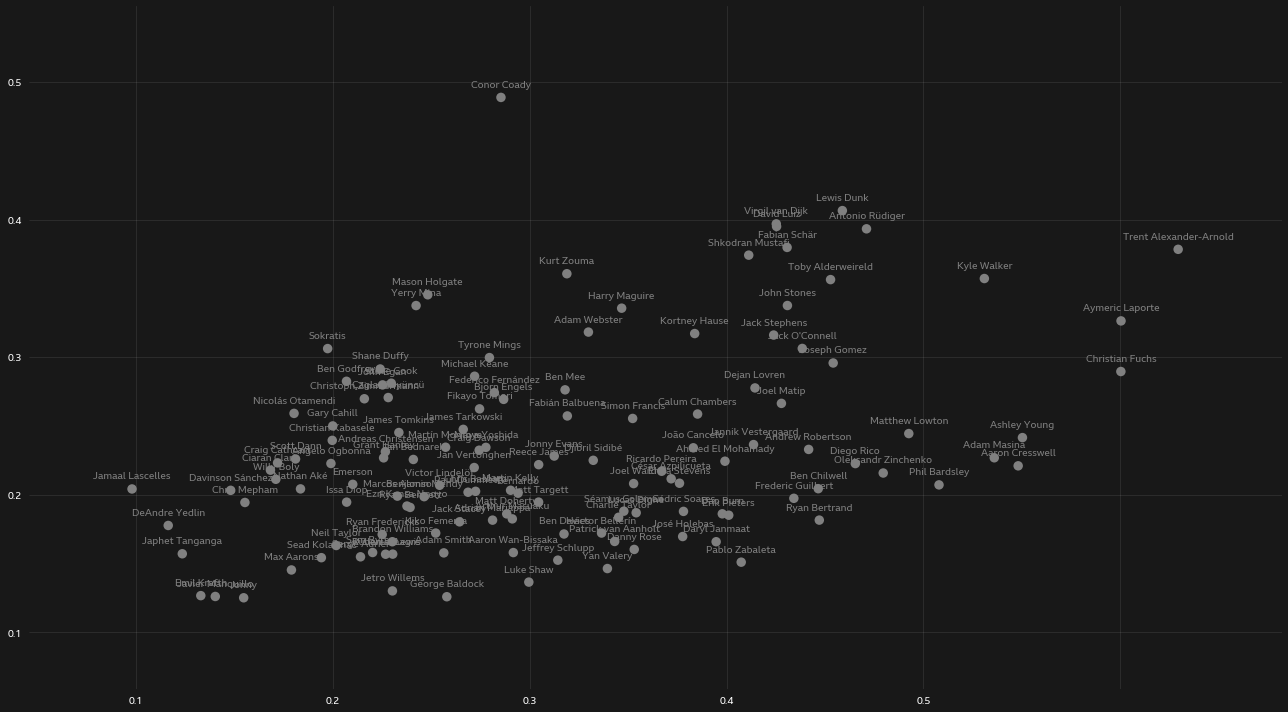

In [6]:
fig, ax = plt.subplots(figsize=(18,10))

csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}




#set and place ticks on main viz
xt = [0,0.1,0.2,0.3,0.4,0.5]
yt = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# ax.set_xticks(xt)
# ax.set_yticks(yt)
# ax.set_xlim(-0.007,0.477)
# ax.set_ylim(-0.02,0.86)
ax.set_xticklabels(xt,color="white", **csfont)
ax.set_yticklabels(yt,color="white", **csfont)

# ax.set_ylabel("non-Penalty Expected Goals (np-xG) per 90 minutes",fontsize=14,fontweight="bold",color="white", **csfont)
# ax.set_xlabel("Final Third Entries",fontsize=14,fontweight="bold",color="white")


plt.box(False)             #add this line
plt.tick_params(color=bg)

bg = "#181818"
#set figure background colour
fig.set_facecolor(bg)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#add gridlines to main viz
ax.grid(zorder=1,color="white",alpha=0.1)

#plot
ax.scatter(df['final_third_entries'], df['accurate_long_balls'], s=90, facecolors='grey', edgecolors='none', zorder=3)
dx, dy = df.final_third_entries.values, df.accurate_long_balls.values
for i in range(len(df)):
        ax.text(dx[i],dy[i]+0.0015,df.player.iloc[i],ha="center",color="grey",zorder=5, **csfont)

plt.tight_layout()
# plt.savefig("Arsenal_xgi",facecolor=bg,bbox_inches="tight");

In [7]:
# Drop columns
df1 = df.drop(['position', 'player', 'team', 'foot'], axis=1)

In [21]:
y = df1['goals_conceded']
X = df1.copy()
del X['goals_conceded']

In [22]:
feature_name = list(X.columns)

In [29]:
# no of maximum features we need to select
num_feats=10

In [30]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [31]:
cor_feature

['successful_open_play_pass',
 'pen_goals_conceded',
 'goals_conceded_obox',
 'expected_goals_nonpenalty_conceded',
 'attempts_conceded_ibox',
 'expected_goals_conceded',
 'expected_goalsontarget_nonpenalty_conceded',
 'clean_sheet',
 'expected_goalsontarget_conceded',
 'goals_conceded_ibox']

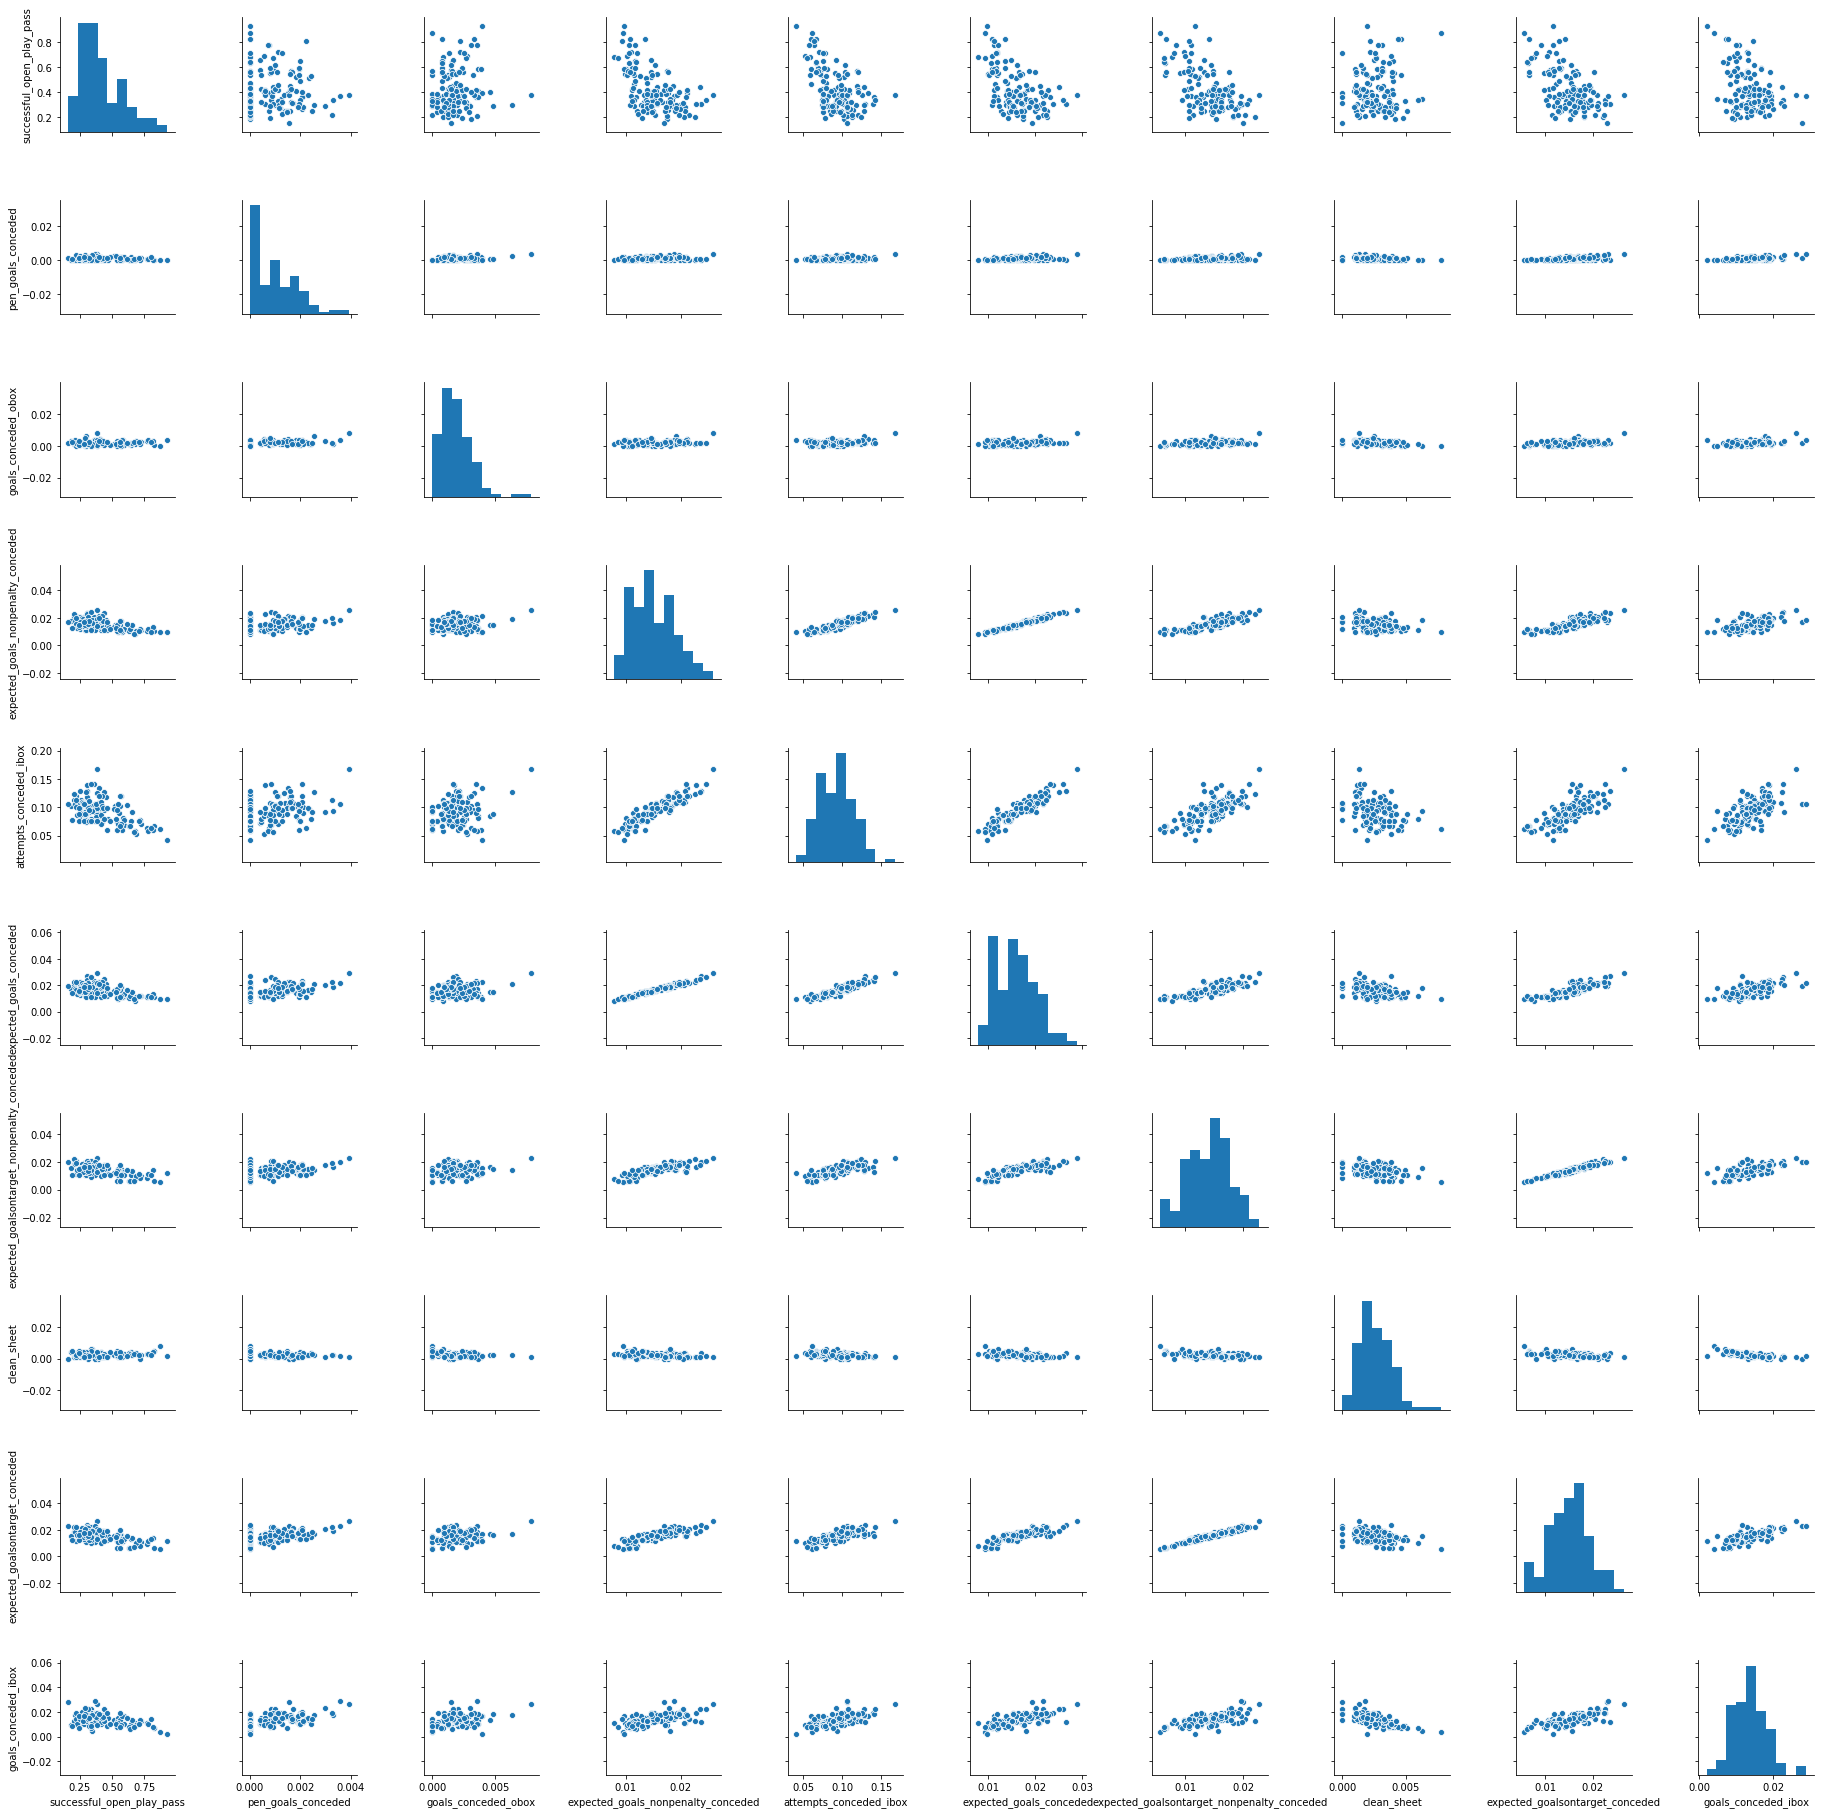

In [33]:
sns.pairplot(df1[['successful_open_play_pass',
 'pen_goals_conceded',
 'goals_conceded_obox',
 'expected_goals_nonpenalty_conceded',
 'attempts_conceded_ibox',
 'expected_goals_conceded',
 'expected_goalsontarget_nonpenalty_conceded',
 'clean_sheet',
 'expected_goalsontarget_conceded',
 'goals_conceded_ibox']]);

In [15]:
y = df1['shots_conc_onfield']
X = df1.copy()
del X['shots_conc_onfield']

In [16]:
feature_name = list(X.columns)

In [17]:
# no of maximum features we need to select
num_feats=30

In [18]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

30 selected features


In [19]:
cor_feature

['att_rf_post',
 'att_goal_high_right',
 'att_goal_high_left',
 'att_goal_low_centre',
 'att_goal_low_left',
 'att_goal_low_right',
 'att_post_high',
 'att_post_left',
 'att_post_right',
 'att_miss_high_right',
 'att_miss_high_left',
 'att_miss_high',
 'att_miss_right',
 'att_miss_left',
 'att_cmiss_high_right',
 'att_cmiss_high_left',
 'att_cmiss_high',
 'att_cmiss_right',
 'att_cmiss_left',
 'att_rf_goal',
 'att_lf_goal',
 'att_hd_goal',
 'att_rf_miss',
 'att_lf_miss',
 'att_hd_miss',
 'att_rf_target',
 'att_lf_target',
 'att_hd_target',
 'att_lf_post',
 'expected_assists_openplay']

In [21]:
all_columns = list(df.columns)
wanted_columns = {'player_id', 'error_lead_to_goal',
 'leftside_pass',
 'total_back_zone_pass',
 'poss_won_mid_3rd',
 'accurate_back_zone_pass',
 'assist_pass_lost',
 'long_pass_own_to_opp_success',
 'total_final_third_passes',
 'outfielder_block',
 'successful_final_third_passes',
 'att_goal_high_left',
 'rightside_pass',
 'total_flick_on',
 'total_fwd_zone_pass',
 'touches',
 'attempts_conceded_obox',
 'total_pass',
 'open_play_pass',
 'accurate_pass',
 'accurate_fwd_zone_pass',
 'successful_open_play_pass',
 'pen_goals_conceded',
 'goals_conceded_obox',
 'expected_goals_nonpenalty_conceded',
 'attempts_conceded_ibox',
 'expected_goals_conceded',
 'expected_goalsontarget_nonpenalty_conceded',
 'clean_sheet',
 'expected_goalsontarget_conceded',
 'goals_conceded_ibox'}
index_columns = [ele for ele in all_columns if ele not in wanted_columns] 

In [22]:
index_columns

['position',
 'player',
 'team',
 'foot',
 'age',
 'team_id',
 'total_scoring_att',
 'ontarget_scoring_att',
 'blocked_scoring_att',
 'goals',
 'own_goals',
 'post_scoring_att',
 'total_cross',
 'accurate_cross',
 'total_through_ball',
 'accurate_through_ball',
 'goal_assist',
 'ontarget_att_assist',
 'total_att_assist',
 'total_tackle',
 'won_tackle',
 'won_corners',
 'lost_corners',
 'total_offside',
 'fouls',
 'hand_ball',
 'dangerous_play',
 'was_fouled',
 'total_contest',
 'won_contest',
 'saves',
 'interception',
 'total_clearance',
 'effective_clearance',
 'total_long_balls',
 'accurate_long_balls',
 'passes_right',
 'passes_left',
 'att_sbx_centre',
 'att_sbx_right',
 'att_sbx_left',
 'att_bx_centre',
 'att_bx_right',
 'att_bx_left',
 'att_obx_centre',
 'att_obx_right',
 'att_obx_left',
 'att_lg_centre',
 'att_lg_right',
 'att_lg_left',
 'att_bxd_right',
 'att_bxd_left',
 'att_obxd_right',
 'att_obxd_left',
 'att_sv_high_centre',
 'att_sv_high_right',
 'att_sv_high_left',
 'att

In [24]:
master_df = master_df.drop(['player_id',
 ['position',
 'team',
 'foot',
 'age',
 'team_id',
 'total_scoring_att',
 'ontarget_scoring_att',
 'blocked_scoring_att',
 'goals',
 'own_goals',
 'post_scoring_att',
 'total_cross',
 'accurate_cross',
 'total_through_ball',
 'accurate_through_ball',
 'goal_assist',
 'ontarget_att_assist',
 'total_att_assist',
 'total_tackle',
 'won_tackle',
 'won_corners',
 'lost_corners',
 'total_offside',
 'fouls',
 'hand_ball',
 'dangerous_play',
 'was_fouled',
 'total_contest',
 'won_contest',
 'saves',
 'interception',
 'total_clearance',
 'effective_clearance',
 'total_long_balls',
 'accurate_long_balls',
 'passes_right',
 'passes_left',
 'att_sbx_centre',
 'att_sbx_right',
 'att_sbx_left',
 'att_bx_centre',
 'att_bx_right',
 'att_bx_left',
 'att_obx_centre',
 'att_obx_right',
 'att_obx_left',
 'att_lg_centre',
 'att_lg_right',
 'att_lg_left',
 'att_bxd_right',
 'att_bxd_left',
 'att_obxd_right',
 'att_obxd_left',
 'att_sv_high_centre',
 'att_sv_high_right',
 'att_sv_high_left',
 'att_sv_low_centre',
 'att_sv_low_right',
 'att_sv_low_left',
 'att_goal_high_centre',
 'att_goal_high_right',
 'att_goal_low_centre',
 'att_goal_low_left',
 'att_goal_low_right',
 'att_post_high',
 'att_post_left',
 'att_post_right',
 'att_miss_high_right',
 'att_miss_high_left',
 'att_miss_high',
 'att_miss_right',
 'att_miss_left',
 'att_cmiss_high_right',
 'att_cmiss_high_left',
 'att_cmiss_high',
 'att_cmiss_right',
 'att_cmiss_left',
 'att_rf_goal',
 'att_lf_goal',
 'att_hd_goal',
 'att_rf_miss',
 'att_lf_miss',
 'att_hd_miss',
 'att_rf_target',
 'att_lf_target',
 'att_hd_target',
 'att_rf_post',
 'att_lf_post',
 'att_hd_post',
 'att_fastbreak',
 'att_rf_total',
 'att_lf_total',
 'att_hd_total',
 'yellow_card',
 'red_card',
 'penalty_conceded',
 'goals_conceded',
 '_perm_user',
 '_perm_group',
 '_perm_access',
 'att_ibox_goal',
 'att_ibox_target',
 'att_ibox_miss',
 'att_ibox_post',
 'att_ibox_blocked',
 'att_obox_goal',
 'att_obox_target',
 'att_obox_miss',
 'att_obox_post',
 'att_obox_blocked',
 'att_obp_total',
 'att_obp_goal',
 'att_obp_target',
 'att_obp_miss',
 'att_obp_post',
 'att_obp_blocked',
 'offtarget_att_assist',
 'last_man_contest',
 'last_man_tackle',
 'total_cross_nocorner',
 'accurate_cross_nocorner',
 'clearance_off_line',
 'saved_ibox',
 'saved_obox',
 'six_yard_block',
 'total_attacking_pass',
 'penalty_save',
 'second_yellow',
 'game_started',
 'head_pass',
 'challenge_lost',
 'aerial_won',
 'aerial_lost',
 'goal_kicks',
 'duel_won',
 'duel_lost',
 'head_clearance',
 'effective_head_clearance',
 'crosses_18yard',
 'crosses_18yardplus',
 'interceptions_in_box',
 'long_pass_own_to_opp',
 'ball_recovery',
 'offside_provoked',
 'error_lead_to_shot',
 'turnover',
 'dispossessed',
 'shot_off_target',
 'final_third_entries',
 'total_launches',
 'accurate_launches',
 'total_layoffs',
 'accurate_layoffs',
 'goal_assist_intentional',
 'penalty_won',
 'total_chipped_pass',
 'accurate_chipped_pass',
 'accurate_flick_on',
 'shield_ball_oop',
 'blocked_cross',
 'effective_blocked_cross',
 'penalty_faced',
 'total_pull_back',
 'accurate_pull_back',
 'goal_assist_openplay',
 'att_assist_openplay',
 'overrun',
 'interception_won',
 'big_chance_created',
 'big_chance_missed',
 'big_chance_scored',
 'unsuccessful_touch',
 'fwd_pass',
 'backward_pass',
 'rescinded_red_card',
 'second_goal_assist',
 'hit_woodwork',
 'goal_fastbreak',
 'shot_fastbreak',
 'poss_won_def_3rd',
 'poss_won_att_3rd',
 'poss_lost_all',
 'poss_lost_ctrl',
 'pen_area_entries',
 'goals_conc_onfield',
 'shots_conc_onfield',
 'total_fastbreak',
 'att_one_on_one',
 'fouled_final_third',
 'goals_openplay',
 'att_openplay',
 'assist_blocked_shot',
 'assist_attempt_saved',
 'assist_post',
 'assist_handball_won',
 'assist_own_goal',
 'assist_penalty_won',
 'attempted_tackle_foul',
 'fifty_fifty',
 'successful_fifty_fifty',
 'put_through',
 'successful_put_through',
 'blocked_pass',
 'failed_to_block',
 'touches_in_opp_box',
 'attempts_ibox',
 'attempts_obox',
 'expected_goals',
 'expected_goals_nonpenalty',
 'expected_goals_openplay',
 'expected_goals_hd',
 'expected_goals_lf',
 'expected_goals_rf',
 'expected_goalsontarget',
 'expected_goalsontarget_nonpenalty',
 'expected_assists',
 'expected_assists_openplay'], axis=1)

SyntaxError: invalid syntax (<ipython-input-24-39a9acb37666>, line 218)